In [ ]:
!nvidia-smi

# 1. Installation

## MMDetection github
**google mmdetection 검색**
- https://github.com/open-mmlab/mmdetection


## Install 절차
**installation 링크**
- https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation

### Step 1. Install MMCV using MIM.

In [1]:
!pip3 install openmim
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 7.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 5.2 MB/s eta 0:00:00


### Step 2. Install MMDetection from the source.

In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 33324, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 33324 (delta 0), reused 1 (delta 0), pack-reused 33322
Receiving objects: 100% (33324/33324), 45.13 MiB | 17.44 MiB/s, done.
Resolving deltas: 100% (23573/23573), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


### Step 3. Verification

In [3]:
import mmdet
print(mmdet.__version__)
# Example output: 2.26.0

2.27.0


/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


### Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [4]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 74.5 MB/s eta 0:00:00
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /content/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection


In [ ]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')

# Train A Detector on A Customized Dataset
- github의 demo 디렉토리 아래 [MMDet_Tutorial.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb) 파일 참조 

### Oxford Pet Dataset 다운로드
* [The Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) 
* Image당 Object가 1개가 있어서 Classification 문제로도 사용됨
* 37개 품종 분류 (품종당 200장 정도 데이터) : Dataset Statistics 확인

In [6]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seokju2","key":"04eb776a70c8fa05e8e39085c8bab7e5"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/face-mask-detection
!unzip face-mask-detection.zip -d mask/
data_dir = './mask/'

In [30]:

from sklearn.model_selection import train_test_split
fileNames = [*os.listdir("./mask/images")]
train, test = train_test_split(fileNames, test_size=0.1, random_state=22)
test, val = train_test_split(test, test_size=0.7, random_state=22)

In [25]:
# download the data
# files: images.tar.gz (dataset) and annotations.tar.gz (groundtruth data).
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz

[Errno 2] No such file or directory: 'mmdetection'
/content/mmdetection
--2023-01-09 01:07:04--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz.1’

images.tar.gz.1     100%[===================>] 755.23M  14.5MB/s    in 55s     

2023-01-09 01:08:01 (13.8 MB/s) - ‘images.tar.gz.1’ saved [791918971/791918971]

--2023-01-09 01:08:01--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/octet-stream]
Saving to: ‘annotations.tar.gz.1’

annotations.ta

In [26]:
# decompress the data
# !mkdir ./oxford_pet
!tar -xvf images.tar.gz -C ./oxford_pet
!tar -xvf annotations.tar.gz -C ./oxford_pet

tar: oxford_pet: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
tar: oxford_pet: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


### Oxford Pet Dataset의 디렉토리 구조 보기

In [9]:
# Check the directory structure of the Oxford Pet

# Install tree first
!apt-get -q install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (63.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!tree ./mask/annotations/

In [ ]:
!tree ./mask/images

### 이미지와 레이블 보기

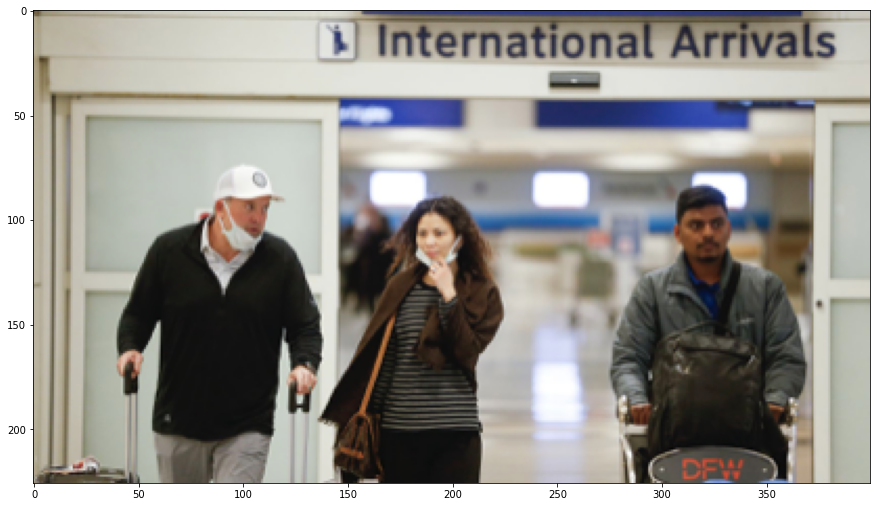

In [41]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('./mask/images/maksssksksss145.png')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [42]:
# Check the label of a single image
!cat ./mask/annotations/maksssksksss145.xml


<annotation>
    <folder>images</folder>
    <filename>maksssksksss145.png</filename>
    <size>
        <width>400</width>
        <height>226</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>mask_weared_incorrect</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>91</xmin>
            <ymin>89</ymin>
            <xmax>114</xmax>
            <ymax>111</ymax>
        </bndbox>
    </object>
    <object>
        <name>mask_weared_incorrect</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>183</xmin>
            <ymin>102</ymin>
            <xmax>203</xmax>
            <ymax>122</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>


In [16]:
img_path = "maksssksksss10"
class_name = img_path[:img_path.rfind('_')]
class_name

'maksssksksss1'

[{'class_name': 'maksssksksss145.pn', 'bndbox_coor': (91, 89, 114, 111)}, {'class_name': 'maksssksksss145.pn', 'bndbox_coor': (183, 102, 203, 122)}, {'class_name': 'maksssksksss145.pn', 'bndbox_coor': (310, 96, 333, 119)}]


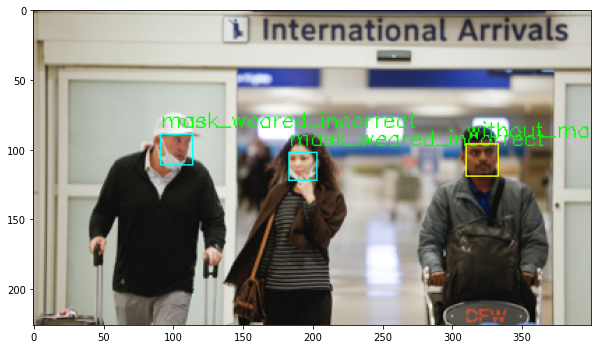

In [46]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
img_dir = "./mask/images/"
xml_file = "./mask/annotations/maksssksksss145.xml"

tree = ET.parse(xml_file)
root = tree.getroot()

img_path = root.find('filename').text
img_full_path = os.path.join(img_dir, img_path)
img = cv2.imread(img_full_path)
dst = img.copy()

objects = root.findall('object')
object_list = []

for obj in objects:
  name = obj.find("name").text
  box = obj.find("bndbox")
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = (x1, y1, x2, y2)
  class_name = img_path[:img_path.rfind('_')]
  if (name=='mask_weared_incorrect') :
    color=(255,255,0)
  elif (name=='with_mask'):
    color=(255,0,255)
  else :
    color=(0,255,255)
  cv2.rectangle(dst, (x1, y1), (x2, y2), color, thickness=1)
  cv2.putText(dst, name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=1 )

  object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

print(object_list)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

### 데이터셋 만들기

In [49]:
import glob

In [51]:
path_an = "./mask/annotations"

In [47]:
dataset = {
            "file":[],
            "name":[],    
            "width":[],
            "height":[],
            "xmin":[],
            "ymin":[],   
            "xmax":[],
            "ymax":[],
           }

In [52]:
for anno in glob.glob(path_an+"/*.xml"):
    tree = ET.parse(anno)
    
    for elem in tree.iter():
        if 'size' in elem.tag:
            for attr in list(elem):
                if 'width' in attr.tag: 
                    width = int(round(float(attr.text)))
                if 'height' in attr.tag:
                    height = int(round(float(attr.text)))    

        if 'object' in elem.tag:
            for attr in list(elem):
                
                if 'name' in attr.tag:
                    name = attr.text                 
                    dataset['name']+=[name]
                    dataset['width']+=[width]
                    dataset['height']+=[height] 
                    dataset['file']+=[anno.split('/')[-1][0:-4]] 
                            
                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            xmin = int(round(float(dim.text)))
                            dataset['xmin']+=[xmin]
                        if 'ymin' in dim.tag:
                            ymin = int(round(float(dim.text)))
                            dataset['ymin']+=[ymin]                                
                        if 'xmax' in dim.tag:
                            xmax = int(round(float(dim.text)))
                            dataset['xmax']+=[xmax]                                
                        if 'ymax' in dim.tag:
                            ymax = int(round(float(dim.text)))
                            dataset['ymax']+=[ymax]

In [57]:
df=pd.DataFrame(dataset)
df

,file,name,width,height,xmin,ymin,xmax,ymax
0,maksssksksss501,with_mask,400,255,1,41,43,125
1,maksssksksss501,with_mask,400,255,48,39,118,124
2,maksssksksss501,with_mask,400,255,162,47,221,123
3,maksssksksss501,with_mask,400,255,242,30,298,105
4,maksssksksss501,with_mask,400,255,301,51,351,118
...,...,...,...,...,...,...,...,...
4067,maksssksksss280,with_mask,400,267,305,12,310,21
4068,maksssksksss280,without_mask,400,267,287,10,295,19
4069,maksssksksss280,without_mask,400,267,347,11,359,21
4070,maksssksksss280,with_mask,400,267,376,21,388,33


In [58]:
name_dict = {
    'with_mask': 0,
    'mask_weared_incorrect': 1,
    'without_mask': 2 
}

In [59]:
df['class'] = df['name'].map(name_dict)

In [60]:
df.head()

,file,name,width,height,xmin,ymin,xmax,ymax,class
0,maksssksksss501,with_mask,400,255,1,41,43,125,0
1,maksssksksss501,with_mask,400,255,48,39,118,124,0
2,maksssksksss501,with_mask,400,255,162,47,221,123,0
3,maksssksksss501,with_mask,400,255,242,30,298,105,0
4,maksssksksss501,with_mask,400,255,301,51,351,118,0


## 데이터 전처리

### 데이터 전처리

In [80]:
df[['xmax', 'ymax', 'xmin', 'ymin']] = df[['xmax', 'ymax', 'xmin', 'ymin']].astype('int64')

#### 데이터 표준화

In [81]:
df['x_center'] = (df['xmax']+df['xmin'])/(2*640)
df['y_center'] = (df['ymax']+df['ymin'])/(2*480)
df['box_height'] = (df['xmax']-df['xmin'])/(640)
df['box_width'] = (df['ymax']-df['ymin'])/(480)

In [91]:
df['x_center'] = (df['xmax']+df['xmin'])/(2*640)
df['y_center'] = (df['ymax']+df['ymin'])/(2*480)
df['box_height'] = (df['xmax']-df['xmin'])/(640)
df['box_width'] = (df['ymax']-df['ymin'])/(480)

In [92]:
df.head()

,file,name,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_height,box_width
0,maksssksksss501,with_mask,400,255,1,41,43,125,0,0.034375,0.172917,0.065625,0.175000
1,maksssksksss501,with_mask,400,255,48,39,118,124,0,0.129688,0.169792,0.109375,0.177083
2,maksssksksss501,with_mask,400,255,162,47,221,123,0,0.299219,0.177083,0.092188,0.158333
3,maksssksksss501,with_mask,400,255,242,30,298,105,0,0.421875,0.140625,0.087500,0.156250
4,maksssksksss501,with_mask,400,255,301,51,351,118,0,0.509375,0.176042,0.078125,0.139583


In [89]:
df=df.drop('box_width',1)

<ipython-input-89-9e58308606fc>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('box_width',1)


####데이터 정규화

In [ ]:
#####

In [66]:
os.mkdir('./mask/train')
os.mkdir('./mask/val')
os.mkdir('./mask/test')
os.mkdir('./mask/train/images')
os.mkdir('./mask/train/labels')
os.mkdir('./mask/test/images')
os.mkdir('./mask/test/labels')
os.mkdir('./mask/val/images')
os.mkdir('./mask/val/labels')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fileNames, test_size=0.1, random_state=42)
test, val = train_test_split(test, test_size=0.7, random_state=42)

In [70]:
from PIL import Image

def copyImages(imageList, folder_Name):
    for image in imageList:
        img = Image.open("./mask/images/"+image)
        img1 = img.resize((640, 480))
        _ = img1.save("./mask/"+folder_Name+"/images/"+image)

In [71]:
copyImages(train, "train")
copyImages(val, "val")
copyImages(test, "test")

In [77]:
df = df.astype('string')

In [78]:
def create_labels(image_list, data_name):
    fileNames = [x.split(".")[0] for x in image_list]

    for name in fileNames:
        data = df[df.file==name]
        box_list = []
        
        for index in range(len(data)):
            row = data.iloc[index]
            box_list.append(row['class'])
            
        text = "\n".join(box_list)
        with open("./mask/"+data_name+"/labels/"+name+".txt", "w") as file:
            file.write(text)        

In [79]:
create_labels(train, "train")
create_labels(val, "val")
create_labels(test, "test")